In [1]:
import xarray as xr
from datetime import datetime
from datetime import timedelta
import os
import numpy as np

In [5]:
# Grab the model data using a start and end time
# only get forecasts with the set lead time

#dataDIR = '/glade/scratch/hardt/STEP_RT2016/cycle/2016070100/wrfout_d02_2016-07-01_00:00:00'
#mfdataDIR = '/glade/scratch/hardt/STEP_RT2016/cycle/2016071921/wrfout_d02_*'
dataPath = '/glade/scratch/hardt'

start = datetime(2016, 6, 24, 0, 0 ,0)
end = datetime(2016, 6, 26, 0, 0, 0)
fcst_lead = timedelta(minutes=180)
forecast_frequency = timedelta(hours=3)

current = start
modelFiles = []
precipFiles = []

while(current < end):
    
    fcst_time = current + fcst_lead
    
    modelFilePath = dataPath + "/STEP_RT" + str(current.year) + "/cycle/" + str(current.strftime("%Y%m%d%H"))
    model_file = modelFilePath + "/wrfout_d02_" + str(fcst_time.date()) + "_" + str(fcst_time.strftime("%H:%M:%S"))
    
    precipFilePath = dataPath + "/qpe_merged_model_domain/" + str(fcst_time.strftime("%Y%m%d"))
    precip_file = precipFilePath + "/" + str(fcst_time.strftime("%H%M%S")) + ".mdv.nc"

    print(precip_file)
    
    if os.path.isfile(model_file):
        if os.path.isfile(precip_file):
            modelFiles.append(model_file)
            precipFiles.append(precip_file)
            print(model_file)
            #print(precip_file)
       
    current = current + forecast_frequency

/glade/scratch/hardt/qpe_merged_model_domain/20160624/030000.mdv.nc
/glade/scratch/hardt/qpe_merged_model_domain/20160624/060000.mdv.nc
/glade/scratch/hardt/qpe_merged_model_domain/20160624/090000.mdv.nc
/glade/scratch/hardt/qpe_merged_model_domain/20160624/120000.mdv.nc
/glade/scratch/hardt/qpe_merged_model_domain/20160624/150000.mdv.nc
/glade/scratch/hardt/qpe_merged_model_domain/20160624/180000.mdv.nc
/glade/scratch/hardt/qpe_merged_model_domain/20160624/210000.mdv.nc
/glade/scratch/hardt/qpe_merged_model_domain/20160625/000000.mdv.nc
/glade/scratch/hardt/qpe_merged_model_domain/20160625/030000.mdv.nc
/glade/scratch/hardt/qpe_merged_model_domain/20160625/060000.mdv.nc
/glade/scratch/hardt/qpe_merged_model_domain/20160625/090000.mdv.nc
/glade/scratch/hardt/qpe_merged_model_domain/20160625/120000.mdv.nc
/glade/scratch/hardt/qpe_merged_model_domain/20160625/150000.mdv.nc
/glade/scratch/hardt/qpe_merged_model_domain/20160625/180000.mdv.nc
/glade/scratch/hardt/qpe_merged_model_domain/201

In [ ]:
#DS = xr.open_dataset(dataDIR)
#DS = xr.open_mfdataset(mfdataDIR)
DS = xr.open_mfdataset(modelFiles, data_vars=['W', 'QRAIN'], combine='nested', concat_dim='Time')

In [221]:
# print the netcdf header
# print(DS.var)

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:                (Time: 16, bottom_top: 50, bottom_top_stag: 51, soil_layers_stag: 4, south_north: 320, south_north_stag: 321, west_east: 410, west_east_stag: 411)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 dask.array<shape=(16, 320, 410), chunksize=(1, 320, 410)>
    XLONG                  (Time, south_north, west_east) float32 dask.array<shape=(16, 320, 410), chunksize=(1, 320, 410)>
    XTIME                  (Time) datetime64[ns] dask.array<shape=(16,), chunksize=(1,)>
    XLAT_U                 (Time, south_north, west_east_stag) float32 dask.array<shape=(16, 320, 411), chunksize=(1, 320, 411)>
    XLONG_U                (Time, south_north, west_east_stag) float32 dask.array<shape=(16, 320, 411), chunksize=(1, 320, 411)>
    XLAT_V                 (Time, south_north_stag, west_east) float32 dask.array<shape=(16, 321, 410), chunksize=(1, 321, 

In [222]:
# print the netcdf dimensions
print(DS.dims)

Frozen(SortedKeysDict({'Time': 16, 'south_north': 320, 'west_east': 410, 'bottom_top': 50, 'bottom_top_stag': 51, 'soil_layers_stag': 4, 'west_east_stag': 411, 'south_north_stag': 321}))


In [223]:
# print the netcdf cooridinates
print(DS.coords)

Coordinates:
    XLAT     (Time, south_north, west_east) float32 dask.array<shape=(16, 320, 410), chunksize=(1, 320, 410)>
    XLONG    (Time, south_north, west_east) float32 dask.array<shape=(16, 320, 410), chunksize=(1, 320, 410)>
    XTIME    (Time) datetime64[ns] dask.array<shape=(16,), chunksize=(1,)>
    XLAT_U   (Time, south_north, west_east_stag) float32 dask.array<shape=(16, 320, 411), chunksize=(1, 320, 411)>
    XLONG_U  (Time, south_north, west_east_stag) float32 dask.array<shape=(16, 320, 411), chunksize=(1, 320, 411)>
    XLAT_V   (Time, south_north_stag, west_east) float32 dask.array<shape=(16, 321, 410), chunksize=(1, 321, 410)>
    XLONG_V  (Time, south_north_stag, west_east) float32 dask.array<shape=(16, 321, 410), chunksize=(1, 321, 410)>


In [224]:
at = DS.attrs
#print(at)
syear = at['START_DATE'][0:4]
print(syear)
print(at['START_DATE'])

2016
2016-06-24_00:00:00


In [225]:
# print information about the W array
print(DS.W)

<xarray.DataArray 'W' (Time: 16, bottom_top_stag: 51, south_north: 320, west_east: 410)>
dask.array<shape=(16, 51, 320, 410), dtype=float32, chunksize=(1, 51, 320, 410)>
Coordinates:
    XLAT     (Time, south_north, west_east) float32 dask.array<shape=(16, 320, 410), chunksize=(1, 320, 410)>
    XLONG    (Time, south_north, west_east) float32 dask.array<shape=(16, 320, 410), chunksize=(1, 320, 410)>
    XTIME    (Time) datetime64[ns] dask.array<shape=(16,), chunksize=(1,)>
Dimensions without coordinates: Time, bottom_top_stag, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  z-wind component
    units:        m s-1
    stagger:      Z


In [226]:
# get the first 16 files and the lowest vertical level
#da = DS.W.sel(Time=slice(0,16),bottom_top_stag=0)

# get the first file and lowest vertical level
#da = DS.W.sel(Time=0,bottom_top_stag=0)

# get all the data at the lowest vertical level
# da = DS.W.sel(bottom_top_stag=0)

# get all the data times and the first 11 levels
# da = DS.W.sel(bottom_top_stag=slice(0,10))

da = DS.W.sel()

In [227]:
# remove the first 104 data points in the west to east direction
# to remove areas over the mountains
da = da.sel( west_east=slice(105,411))

In [228]:
print(da)

<xarray.DataArray 'W' (Time: 16, bottom_top_stag: 51, south_north: 320, west_east: 305)>
dask.array<shape=(16, 51, 320, 305), dtype=float32, chunksize=(1, 51, 320, 305)>
Coordinates:
    XLAT     (Time, south_north, west_east) float32 dask.array<shape=(16, 320, 305), chunksize=(1, 320, 305)>
    XLONG    (Time, south_north, west_east) float32 dask.array<shape=(16, 320, 305), chunksize=(1, 320, 305)>
    XTIME    (Time) datetime64[ns] dask.array<shape=(16,), chunksize=(1,)>
Dimensions without coordinates: Time, bottom_top_stag, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  z-wind component
    units:        m s-1
    stagger:      Z


In [229]:
da_numpy = np.array(da.values)

In [230]:
# print(da_numpy)

In [231]:
times, lvls, xs, ys = da_numpy.shape
print(times, lvls, xs, ys)
print(da_numpy[0,0,0,1])
print(da.values[0,0,0,1])

16 51 320 305
-0.005806016
-0.005806016


In [232]:
#print(da_numpy[0,:lvls,0,0])
print(np.max(da_numpy[1,:,0,0]))
print(da.values[1,:,0,0].max())

0.15636633
0.15636633


In [233]:
da_max_column = np.zeros( (times,1,xs,ys) )
print(da_max_column.shape)
for time in range(times):
    for x in range(xs):
        for y in range(ys):
            da_max_column[time,0,x,y] = np.max(da_numpy[time,:,x,y])

(16, 1, 320, 305)


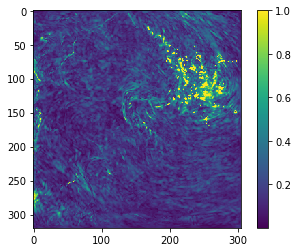

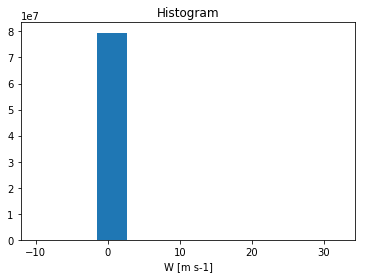

In [234]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.imshow(da_max_column[3,0,0:,0:])
plt.colorbar()
plt.clim(np.min(da_max_column[3,0,0:,0:]), np.max(da_max_column[3,0,0:,0:]))
plt.clim(np.min(da_max_column[3,0,0:,0:]),1)
plt.show()

da.plot()
plt.show()

In [160]:
# print(da.XTIME.values)
# print(da.XTIME.dt.year.values)
# print(da.XTIME.dt.month.values)
# print(da.XTIME.dt.day.values)
# print(da.XTIME.dt.hour.values)
# print(da.XTIME.dt.minute.values)
# print(da.XTIME.dt.second.values)
# print(da.XLONG.values[0])
# print(da.XLAT.values[0])

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [16]:
TS = xr.open_mfdataset(precipFiles)
print(TS.dims)
print(TS.coords)
print(TS.attrs)
print(TS.RATE_HYBRID)
ta = TS.RATE_HYBRID
print(ta)

Frozen(SortedKeysDict({'x0': 410, 'y0': 320, 'z0': 1, 'time': 16}))
Coordinates:
  * x0       (x0) float32 -336.42917 -333.42917 -330.42917 ... 887.5708 890.5708
  * y0       (y0) float32 -473.38916 -470.38916 ... 480.61084 483.61084
    lat0     (y0, x0) float32 34.48191 34.48318 34.48444 ... 42.807396 42.80348
    lon0     (y0, x0) float32 -108.72995 -108.69674 ... -93.72218 -93.68457
  * z0       (z0) float32 1.0
  * time     (time) datetime64[ns] 2016-06-24T03:00:00 ... 2016-06-26
OrderedDict([('Conventions', 'CF-1.6'), ('history', 'Data merged from following files:\n  /home/nowcast/data/front_porch/mdv/radar/KCYS/qpe/20160624/030039.mdv\n  /home/nowcast/data/front_porch/mdv/radar/KFTG/qpe/20160624/030117.mdv\n  /home/nowcast/data/front_porch/mdv/radar/KGLD/qpe/20160624/025904.mdv\n  /home/nowcast/data/front_porch/mdv/radar/KPUX/qpe/20160624/030025.mdv\n'), ('source', 'Merged QPE data created by MdvMerge2.'), ('title', 'Merged-QPE'), ('comment', '')])
<xarray.DataArray 'RATE_HYBRID

/glade/work/hardt/20190723/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/glade/work/hardt/20190723/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


In [17]:
ta = ta.sel()
print(ta)

<xarray.DataArray 'RATE_HYBRID' (time: 16, z0: 1, y0: 320, x0: 410)>
dask.array<shape=(16, 1, 320, 410), dtype=float32, chunksize=(1, 1, 320, 410)>
Coordinates:
  * x0       (x0) float32 -336.42917 -333.42917 -330.42917 ... 887.5708 890.5708
  * y0       (y0) float32 -473.38916 -470.38916 ... 480.61084 483.61084
    lat0     (y0, x0) float32 34.48191 34.48318 34.48444 ... 42.807396 42.80348
    lon0     (y0, x0) float32 -108.72995 -108.69674 ... -93.72218 -93.68457
  * z0       (z0) float32 1.0
  * time     (time) datetime64[ns] 2016-06-24T03:00:00 ... 2016-06-26
Attributes:
    standard_name:  RATE_HYBRID
    long_name:      RATE_HYBRID
    units:          mm/h
    grid_mapping:   grid_mapping_0


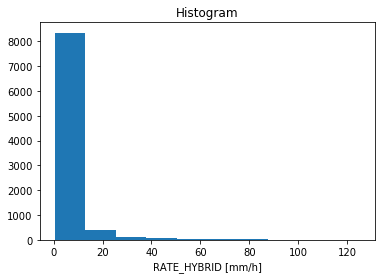

In [18]:
ta.plot()
plt.show()